# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps. Now, this analysis would require a preliminary understanding of the features that define a well-performing app. You can ask questions like:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [3]:
#import the libraries
import pandas as pd
import numpy as np

In [4]:
#read the dataset and check the first five rows
inp0 = pd.read_csv("googleplaystore_v2.csv")


In [5]:
#Check the shape of the dataframe
inp0.shape

(10841, 13)

### Data Handling and Cleaning

The first few steps involve making sure that there are no __missing values__ or __incorrect data types__ before we proceed to the analysis stage. These problems above are handled as follows:

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Inputting the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

In [8]:
#Check the datatypes of all the columns of the dataframe
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [10]:
#Check the number of null values in the columns
inp0.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing values for rating
 - Ratings is the target variable
 - drop the records

In [12]:
#Drop the rows having null values in the Rating field
inp1 = inp0[~inp0.Rating.isnull()]

#Check the shape of the dataframe
inp1.shape

(9367, 13)

In [13]:
#Check the number of nulls in the dataframe again and find the total number of null values

inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [14]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [15]:
#Drop the row having shifted values
inp1 = inp1[~(inp1["Android Ver"].isnull() & (inp1.Category == "1.9"))]

#Check the nulls againin Android version column to cross-verify
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


Inputing Missing Values

- For numerical variables use mean and median
- For categorical variables use mode

In [17]:
#Check the most common value in the Android version column
inp1["Android Ver"].value_counts()

inp1["Android Ver"].mode()[0]

'4.1 and up'

In [18]:
#Fill up the nulls in the Android Version column with the above value
inp1["Android Ver"] = inp1["Android Ver"].fillna(inp1["Android Ver"].mode()[0])

In [19]:
#Check the nulls in the Android version column again to cross-verify
inp1["Android Ver"].value_counts()

Android Ver
4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: count, dtype: int64

In [20]:
#Check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [21]:
#Check the most common value in the Current version column
inp1['Current Ver'].value_counts()

Current Ver
Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: count, Length: 2638, dtype: int64

In [22]:
#Replace the nulls in the Current version column with the above value

inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [23]:
#Check the most common value in the Current version column again
inp1['Current Ver'].isnull().sum()

0

#### Handling Incorrect Data Types 

In [25]:
#Check the datatypes of all the columns 
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
inp1.head()

# colums "Reviews", "Installs", "Price" and "Last Updated" should not be objects they are numeric and a date value

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
#Analyse the Price column to check the issue
inp1["Price"].value_counts() 


Price
0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: count, Length: 73, dtype: int64

In [28]:
# becuse of the "$" symbol the DataType of the column is Object lets fix that

inp1.Price = inp1.Price.apply( lambda x : 0 if x =='0' else float(x[1:]))

In [29]:
#Verify the dtype of Price once again
inp1.Price.dtype

dtype('float64')

In [30]:
#Analyse the Reviews column
inp1.Reviews.value_counts()

Reviews
2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: count, Length: 5992, dtype: int64

In [31]:
#fixing the data type
inp1.Reviews = inp1.Reviews.astype("int32")

In [32]:
#checking the data type and spread of Reviews feature
#inp1.Reviews.dtype
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [33]:
#Analyse the Installs Column
inp1.Installs.value_counts()


Installs
1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: count, dtype: int64

In [34]:
#Question Clean the Installs Column and find the approximate number of apps at the 50th percentile.
# df['Other'].apply(lambda x: x.translate(str.maketrans('', '', ',+')))

inp1.Installs = inp1.Installs.apply(lambda x: x.translate(str.maketrans('', '', ',+'))).astype("int32")


In [35]:
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

#### Sanity Checks

The data that we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. Some sanity checks can be:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [38]:
#Rating is between 1 and 5 for all the apps.
inp1.Rating.describe()


count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [39]:
#sanity checks on the Reviews column, The number of reviews should not be greater than the number of Installs

inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [40]:
#there are some records where reviews should not have been greater than number of installs and we need to remove such records as they could mess up our analysis
inp1 = inp1[(inp1.Installs >= inp1.Reviews)]

In [41]:
#perform the sanity checks on prices of free apps 
inp1[(inp1.Price > 0) & (inp1.Type =="Free")]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Outliers Analysis Using Boxplot

In [43]:
#import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

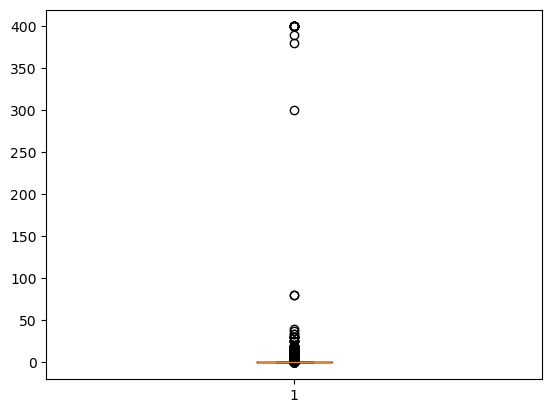

In [44]:
#Create a box plot for the price column
plt.boxplot(inp1.Price)
plt.show

In [45]:
#Checking apps with price more than 200
inp1[inp1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


Most of the values here are redundent and apps seems suspecious 

In [47]:
#Clean the Price column
inp1 = inp1[inp1.Price < 200]

<Axes: >

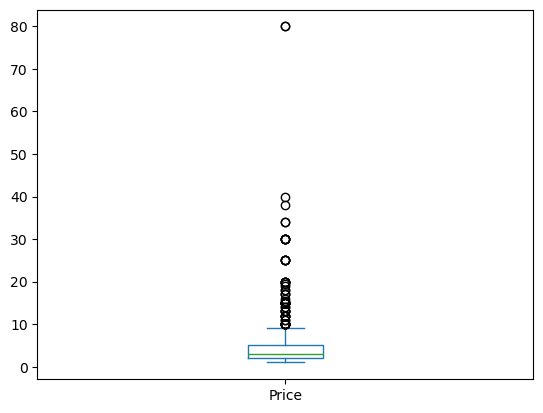

In [48]:
#Create a box plot for paid apps

inp1[inp1.Price>0].Price.plot.box()

In [49]:
#Check the apps with price more than 30
inp1[inp1.Price >30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [50]:
#Clean the Price column again
inp1 = inp1[inp1.Price < 30]

(array([9.212e+03, 8.100e+01, 1.900e+01, 9.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 3.000e+00, 7.000e+00, 2.000e+00]),
 array([1.00000000e+00, 7.81583150e+06, 1.56316620e+07, 2.34474925e+07,
        3.12633230e+07, 3.90791535e+07, 4.68949840e+07, 5.47108145e+07,
        6.25266450e+07, 7.03424755e+07, 7.81583060e+07]),
 <BarContainer object of 10 artists>)

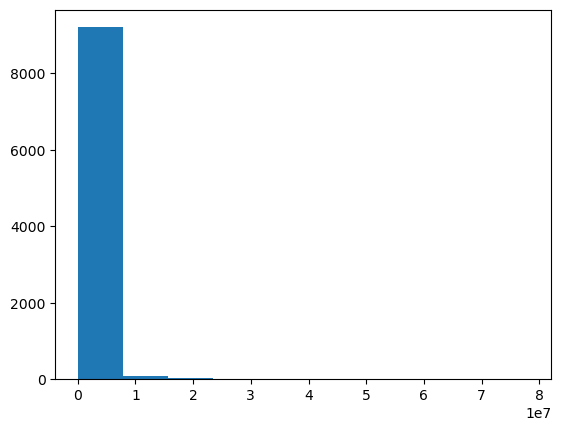

In [52]:
#Create a histogram of the Reviews, plt.hist() to plot a histogram.
plt.hist(inp1.Reviews)



Most of the values are in the first bin, Alot of extream values maybe present, lets make a box plot to see how many extream values exist

<function matplotlib.pyplot.show(close=None, block=None)>

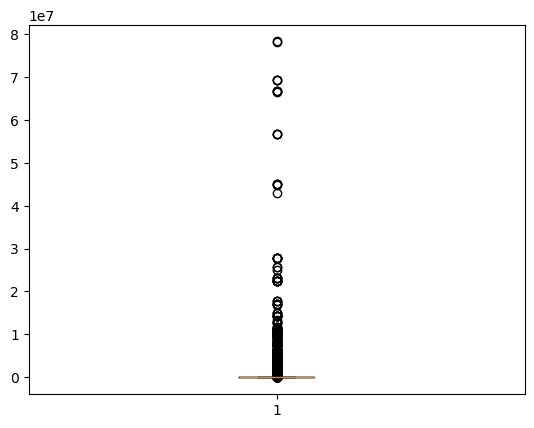

In [54]:
#Create a boxplot of the Reviews column

plt.boxplot(inp1.Reviews)
plt.show

Alot of extream values can be seen in the box plot which we need to fix to get a genralised analysis

In [56]:
#Check records with 10 million reviews
inp1[inp1.Reviews > 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


Dropping the Records which have extreamly high number of reviews ( where reviews are greater than 1M) , because they might cause skewness in our analysis. 

In [58]:
#Drop the above records

inp1 = inp1[inp1.Reviews < 1000000]
inp1.shape

(8634, 13)

Now the data is much cleaner where we dont have those extraordinary apps which we should not study for our purpose
These apps are already preinstalled on phones in many cases
these apps won’t be useful for our analysis since they already have skewed statistics (an extremely high number of installs and reviews), which is not common for a majority of the rest of the apps. Hence, you took a qualifier of 1 million reviews and removed all the apps having more reviews.

<function matplotlib.pyplot.show(close=None, block=None)>

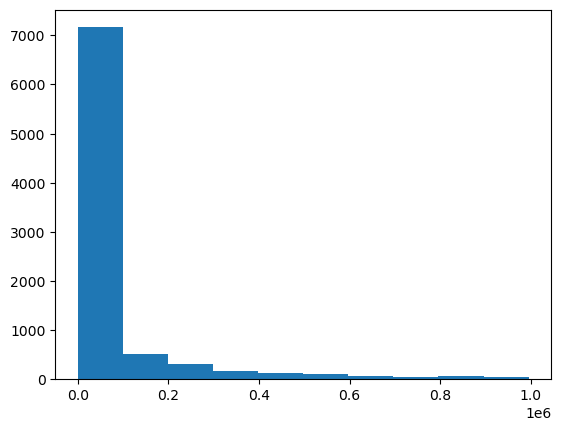

In [60]:
#checking histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show


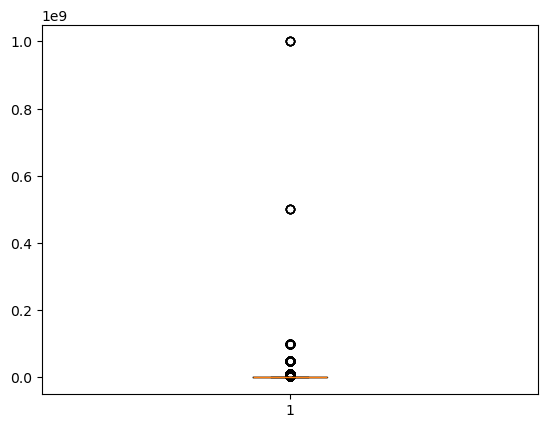

In [61]:
#checking box plot for the Installs column and report back the IQR

plt.boxplot(inp1.Installs)
plt.show()


In [62]:
#CLean the Installs by removing all the apps having more than or equal to 100 million installs
#these are the apps that come pre-installed on android phones

inp1 = inp1[inp1.Installs < 100000000]


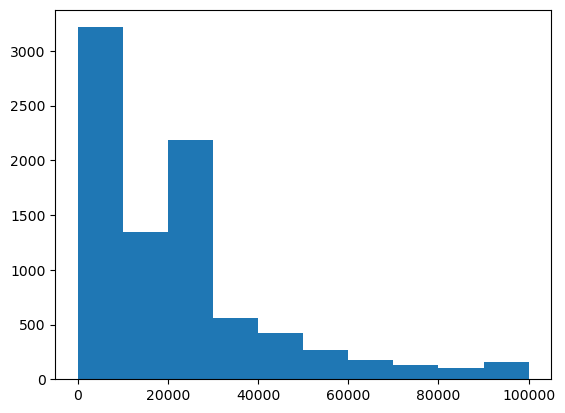

In [63]:
#Plot a histogram for Size as well.
plt.hist(inp1.Size)
plt.show()

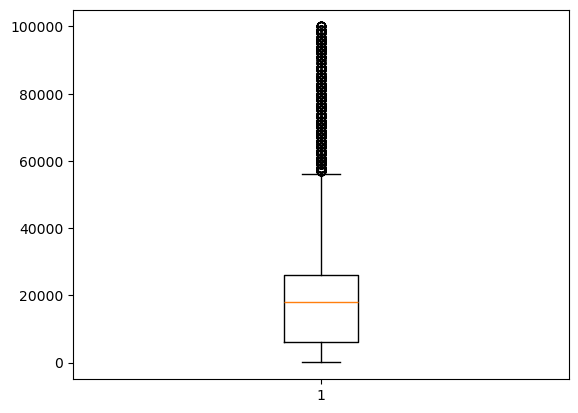

In [64]:
#checking boxplot for the Size column and the median value
plt.boxplot(inp1.Size)
plt.show()

In [65]:
#import the necessary libraries
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

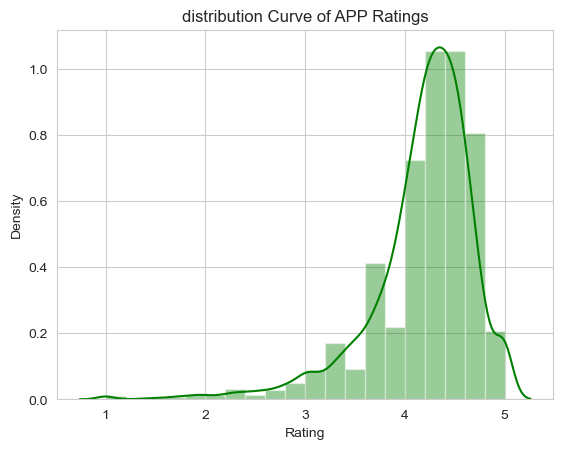

In [66]:
#Check all the styling options

#plt.style.use("fivethirtyeight")
sns.set_style("whitegrid")
#plt.style.use("default")
sns.distplot(inp1.Rating, bins = 20, color ='g')
plt.title("distribution Curve of APP Ratings", fontsize = 12)
plt.show()

after changing the number of bins to 20, we observed that most ratings lie in the 4-5 range.
This is quite a useful insight, which highlights the peculiarities of this domain.
If people dislike an app, they don’t generally wait to give it bad ratings; rather, they go ahead and remove it immediately. Therefore, the average ratings of the apps are pretty high. average may not be the correct feature to analyze ratings


In [68]:
#Analyse the Content Rating column
inp1["Content Rating"].value_counts()

Content Rating
Everyone           6898
Teen                918
Mature 17+          417
Everyone 10+        336
Adults only 18+       3
Unrated               1
Name: count, dtype: int64

In [69]:
#Removeing the categories with only 3 & 1 records, as they would make tiny sections in graphs that would hamper our analysis and they wont provide any value

inp1 = inp1[~inp1["Content Rating"].isin(["Adults only 18+","Unrated"])]


In [70]:
#Reset the index so we have continuous index values
inp1.reset_index(inplace= True, drop= True)

In [71]:
#Check the apps belonging to different categories of Content Rating 
inp1["Content Rating"].value_counts()

Content Rating
Everyone        6898
Teen             918
Mature 17+       417
Everyone 10+     336
Name: count, dtype: int64

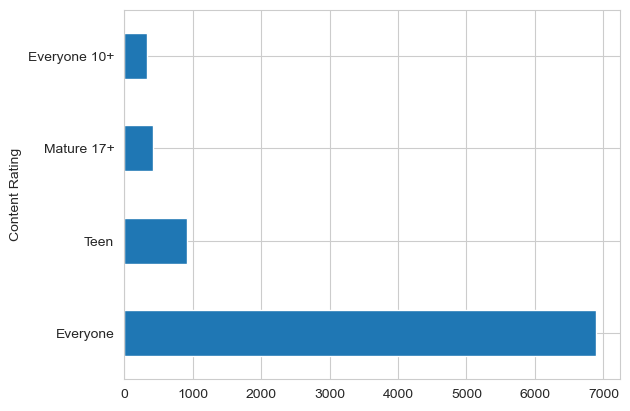

In [72]:
#Plot a bar chart
inp1["Content Rating"].value_counts().plot.barh()
plt.show()

### Size Vs Ratings

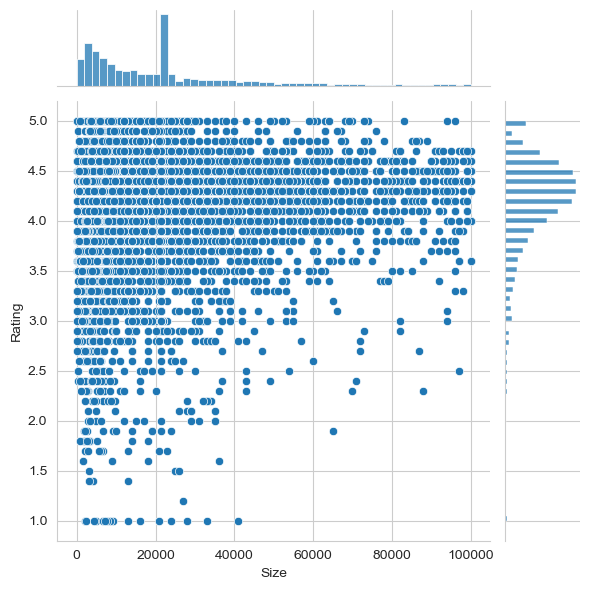

In [74]:
sns.jointplot(x="Size", y="Rating", data=inp1)  
plt.show()

###### Conclusion: We can observer that Apps which are larger in size has low number of Bad Ratings

### Ratings vs Price

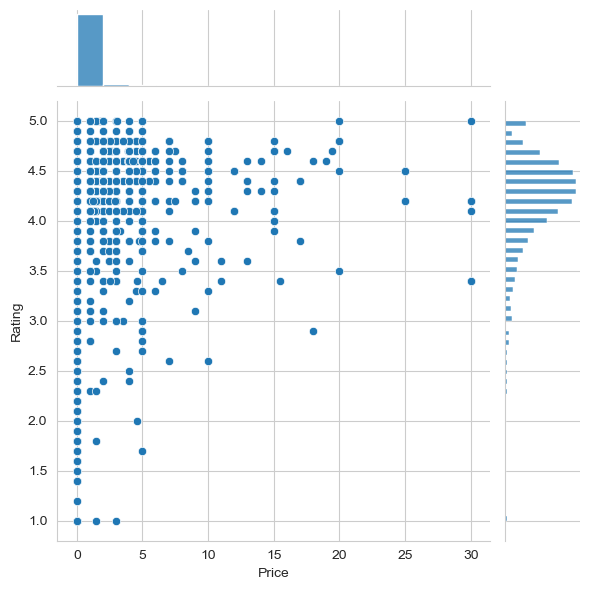

In [77]:
## Plot a jointplot for Price and Rating
sns.jointplot(x="Price", y="Rating", data=inp1)  
plt.show()

 ######  Conclusion : Apps which are Priced higher have very minimal low Ratings| But most of the Apps are free hence we see the huge bar on the 0$ band
 

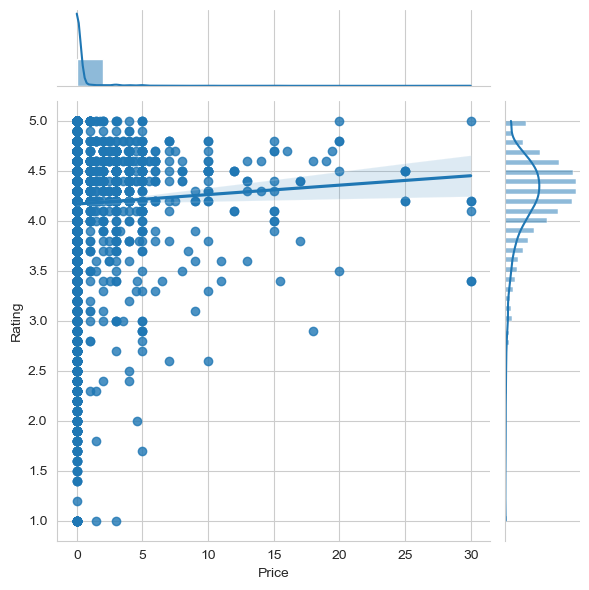

In [79]:
##Plot a reg plot for Price and Rating and observe the trend
sns.jointplot(x="Price", y="Rating", data=inp1, kind = "reg")  
plt.show()


##### There is a slight positive slope for the line, we can say that rating tends to improve as price goes up

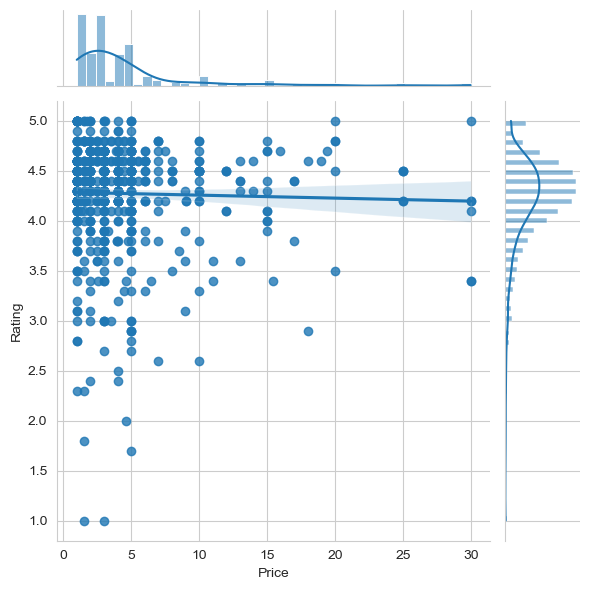

In [81]:
## lets Plot a reg plot for Price and Rating again for only the paid apps.

sns.jointplot(x=inp1.Price[inp1.Price>0], y="Rating", data=inp1, kind = "reg")  
plt.show()

In [82]:
inp1[['Price', 'Rating', 'Size']].corr()

,Price,Rating,Size
Price,1.000000,0.030901,-0.001654
Rating,0.030901,1.000000,0.058554
Size,-0.001654,0.058554,1.000000


##### there is weak positve correlatiob between Size and Rating &  and Price & Rating

In [84]:
inp1[inp1.Price > 0][['Price', 'Rating', 'Size']].corr()

,Price,Rating,Size
Price,1.000000,-0.025975,0.024912
Rating,-0.025975,1.000000,0.117943
Size,0.024912,0.117943,1.000000


##### For Paid Apps there is weak positve Corelation between  Rating and Size,  and a Negative Correlation between Price And Rating  Hence Cheaper Apps have better ratings compared to expensive apps


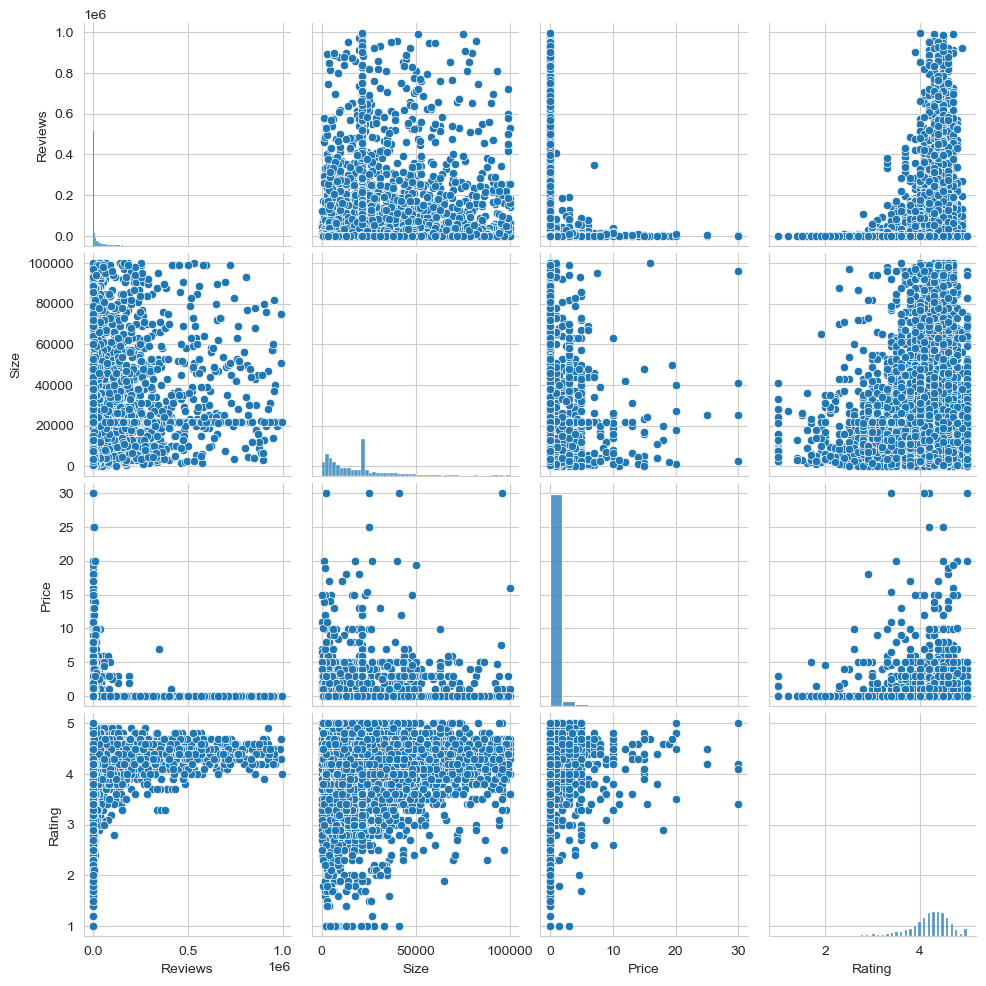

In [86]:
## Creating a pair plot for Reviews, Size, Price and Rating

sns.pairplot(inp1[["Reviews", "Size", "Price", "Rating"]])
plt.show()


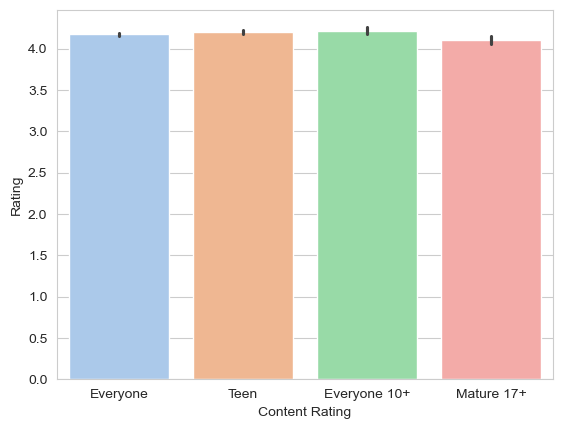

In [87]:
##Ploting bar plot for Rating vs Content Rating
sns.barplot(data = inp1, x= "Content Rating", y = "Rating" ,palette="pastel")
plt.show()


Things are very unclear as most of the values are like 4.1-4.2 , we will have to look for lower quratile values

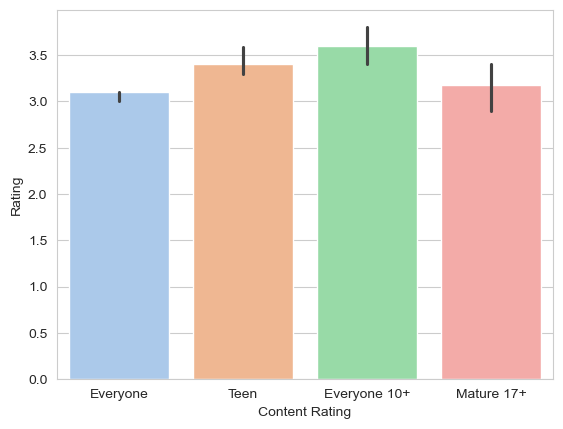

In [89]:
##Ploting the bar plot with only the 5th percentile of Ratings
sns.barplot(data = inp1, x= "Content Rating", y = "Rating", estimator= lambda x : np.quantile(x,0.05) ,palette="pastel")
plt.show()

Earlier it was all the same approximatly but now we can clearly see that in the lower percentile the "Everyone 10+" bucket is having doing better than others

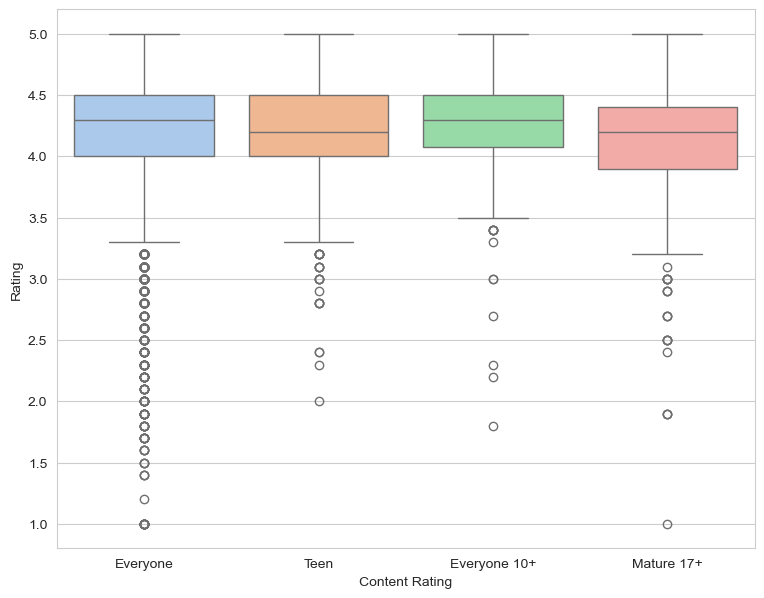

In [91]:
##Plot a box plot of Rating vs Content Rating for a better view
plt.figure(figsize=[9,7])
sns.boxplot(data = inp1,x= "Content Rating", y = "Rating" ,palette="pastel")
plt.show()

With Box plots we can see more clearly that "Everyone 10+" has low minimal values among all the category and a higher 75th percentile value as well as higher mean
The upper fences for all the categories get capped at 5.0, whereas there are some observable differences in the lower fences.



#### Ratings vs Size vs Content Rating


In [94]:
##Prepareing buckets for the Size column using pd.qcut

inp1["Size_Bucket"]  = pd.qcut(inp1.Size,[0,0.2,0.4,0.6,0.8,1.0],["VL","L","M","H","VH"])

In [95]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Bucket
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,M
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,M
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,L
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,H
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,VL


In [96]:
##Creating a pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data = inp1, index = "Content Rating",columns= "Size_Bucket", values="Rating",aggfunc=lambda x : np.quantile(x,0.2))

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.84,3.94,4.1,4.0,4.0
Mature 17+,3.28,3.64,3.7,3.9,4.0
Teen,3.86,3.80,3.9,4.0,4.0


Taking Data of 20th percentile values because otherwise the values were too close to make any analysis

In [98]:
##Store the pivot table in a separate variable
rsc_pv = pd.pivot_table(data = inp1, index = "Content Rating",columns= "Size_Bucket", values="Rating",aggfunc=lambda x : np.quantile(x,0.2))

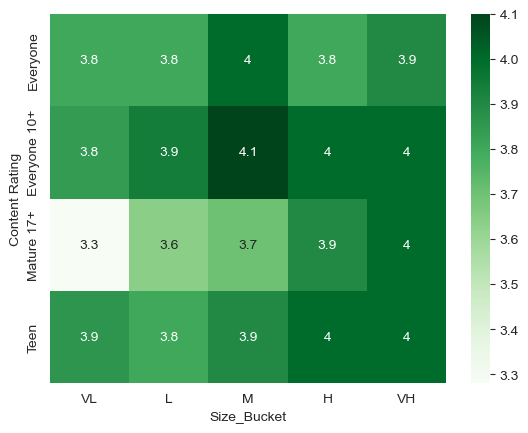

In [99]:
##Plot a heat map
sns.heatmap(rsc_pv, cmap="Greens", annot=True)
plt.show()

With the Heatmap we can clearly seee that users are more Happy with larger apps in Size which might have more features

In [196]:
inp1.dtypes

App                 object
Category            object
Rating             float64
Reviews              int32
Size               float64
Installs             int32
Type                object
Price              float64
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
Size_Bucket       category
dtype: object

In [202]:
## Extract the month from the Last Updated Date
inp1['updated_month'] = pd.to_datetime(inp1["Last Updated"]).dt.month


In [208]:
## Find the average Rating across all the months

inp1.groupby(["updated_month"])["Rating"].mean()

updated_month
1     4.145050
2     4.090385
3     4.107963
4     4.148326
5     4.153894
6     4.172865
7     4.222399
8     4.270607
9     4.041406
10    4.012739
11    4.102020
12    4.064939
Name: Rating, dtype: float64

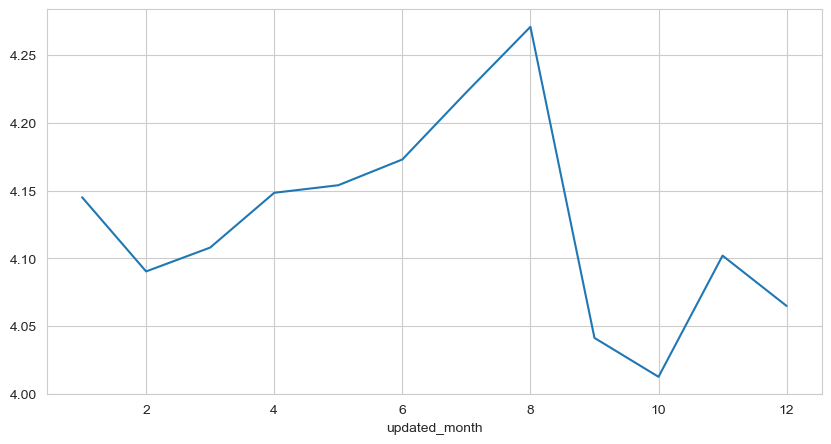

In [220]:
## Ploting a line graph
plt.figure(figsize=[10,5])
inp1.groupby(["updated_month"])["Rating"].mean().plot()
plt.show()

We do observe a spike on the 8th month for ratings

In [223]:
## Creating a pivot table for Content Rating and updated Month with the values set to Installs
pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,725387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1461067800,118173500,50140100,202689600
6,2127170505,217727100,145257200,415716600
7,6371109680,456556000,419491910,1143556800
8,4430943320,215821000,312981700,1057855650
9,260340410,24931100,2201010,22483100


In [225]:
##Store the table in a separate variable
monthly = pd.pivot_table(data=inp1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)

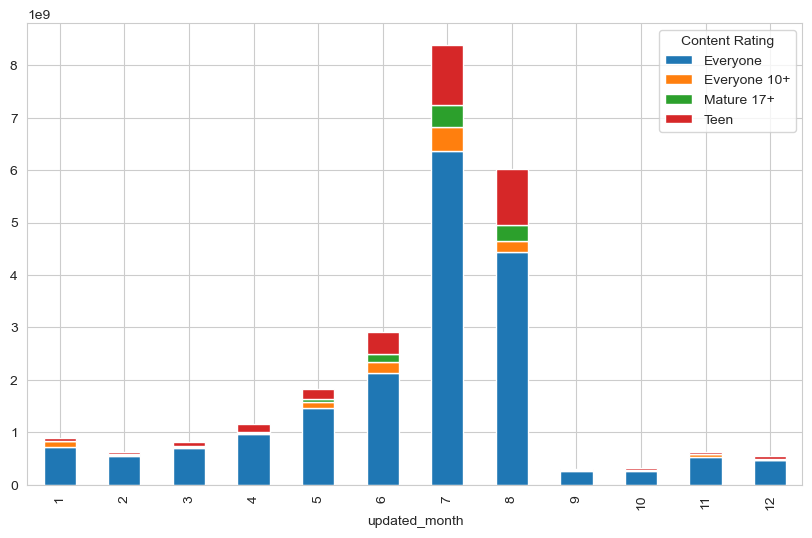

In [235]:
##Plot the stacked bar chart.
monthly.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

In [269]:
##Plot the stacked bar chart again wrt to the proportions.

monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(),axis =1)

monthly_perc

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,0.820083,0.119026,0.010968,0.049924
2,0.882747,0.032083,0.021077,0.064093
3,0.853576,0.037222,0.011184,0.098018
4,0.836553,0.020025,0.004520,0.138902
5,0.797495,0.064503,0.027368,0.110634
6,0.732025,0.074927,0.049987,0.143061
7,0.759305,0.054412,0.049995,0.136288
8,0.736330,0.035865,0.052011,0.175794
9,0.839928,0.080434,0.007101,0.072537


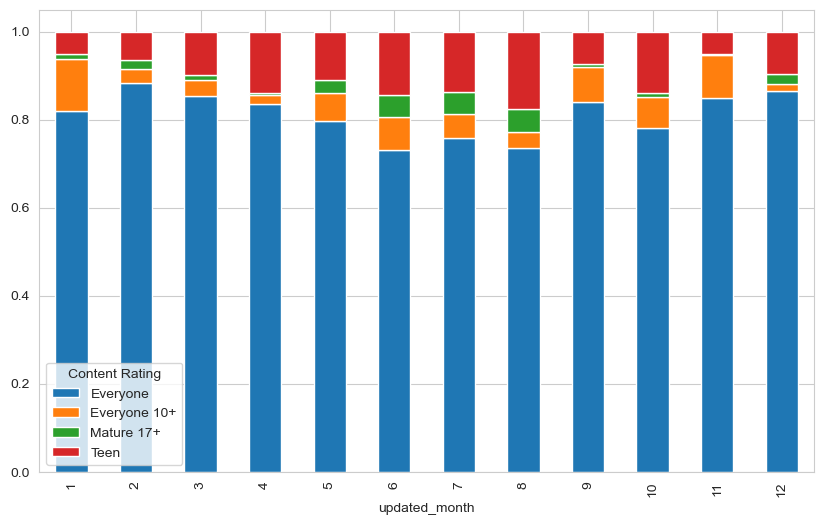

In [271]:
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

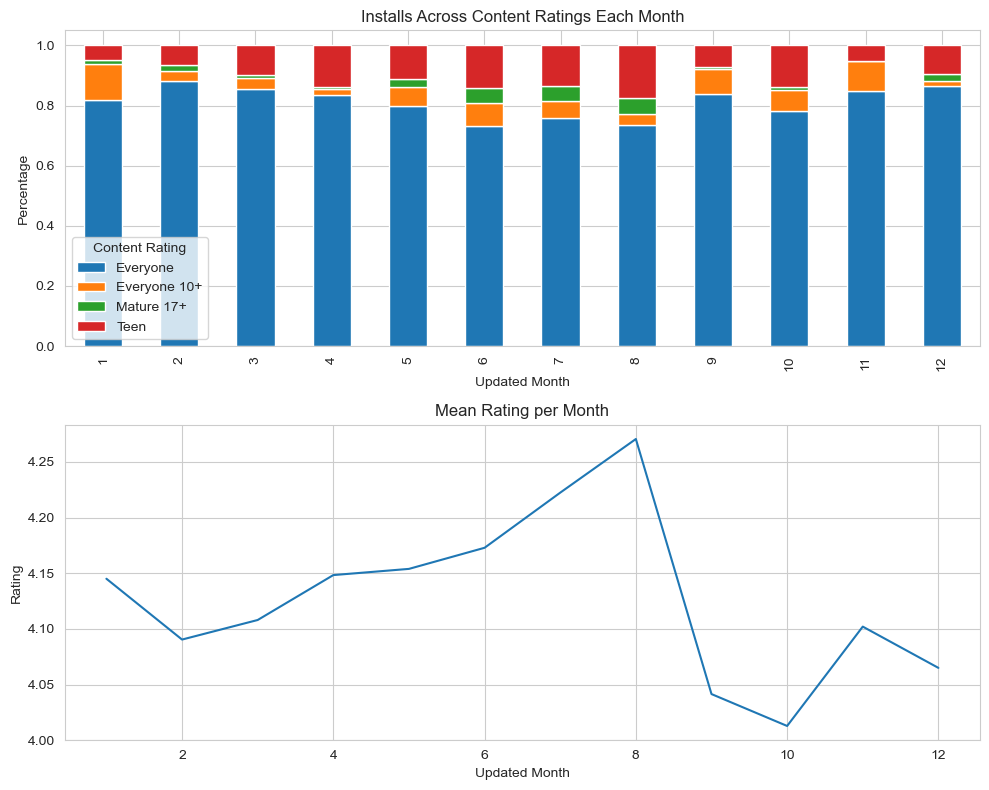

In [293]:

# Create a figure with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# First plot: Stacked Bar Chart for `monthly_perc`
monthly_perc.plot(kind="bar", stacked=True, ax=axes[0])
axes[0].set_title("Installs Across Content Ratings Each Month")
axes[0].set_xlabel("Updated Month")
axes[0].set_ylabel("Percentage")

# Second plot: Mean Rating per Month
inp1.groupby(['updated_month'])['Rating'].mean().plot(ax=axes[1])
axes[1].set_title("Mean Rating per Month")
axes[1].set_xlabel("Updated Month")
axes[1].set_ylabel("Rating")

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

#### The Spike in Ratings in the 8th Month and  Percentage of content rating in the 8th month the participation of TEEN category is increased, maybe its a holiday season for teens hence the spike